In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

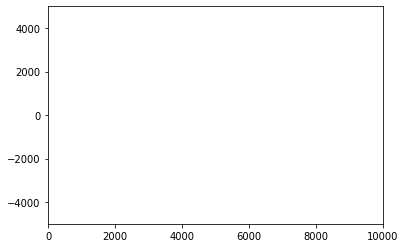

In [152]:
fig, ax = plt.subplots()

ax = plt.axes(xlim=(-10, 10000), ylim=(-5000, 5000))

line, = ax.plot([], [], lw=2)

In [204]:
def circle_of(radius):
    points = []
    for i in range(2*4*15):
        points.append([radius * np.cos(i/15), radius * np.sin(i/15)])
    
    return np.array(points)

In [207]:
points = circle_of(200)

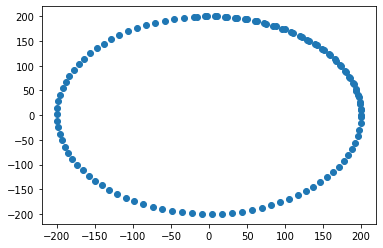

In [208]:
plt.scatter(points[:, 0], points[:, 1])

In [266]:
def init():
    line.set_data([], [])
    return (line,)
# animation function. This is called sequentially

sphere_1 = AssumedSphere(5, 0, 20, (2000, 0))
sphere_2 = AssumedSphere(5, 0, -200, (9000, 0))

def animate(t): 
    # t is a parameter
    
    # x, y values to be plotted 
    
    # appending new points to x, y axes points list 

    xs = []
    ys = []
    for x_set, y_set in [sphere_1.vis(t), sphere_2.vis(t)]:
        xs.extend(x_set)
        ys.extend(y_set)
    line.set_data(xs, ys)

    return line, 

In [267]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=70, interval=100, blit=True)

In [268]:
HTML(anim.to_html5_video())


2 objects that move

In [269]:
class AssumedSphere:
    def __init__(self, mass, v_i, f_i, pos_i):
        self.mass = mass
        self.v_i = v_i
        self.f_i = f_i
        self.pos_i = pos_i 
        self.points = self.draw()
    
    @staticmethod
    def draw():
        return circle_of(200)

    @property
    def acc(self):
        return self.f_i / self.mass
    
    def vel(self, time):
        return self.v_i + self.acc * time
    
    def delta_pos(self, time):
        return self.v_i * time + .5 * self.acc * np.square(time), 0
    
    def vis(self, time):
        data =  self.points + self.pos_i + self.delta_pos(time)
        
        return data[:, 0], data[:, 1]

In [256]:
sphere_1.vel(200)

800.0

In [259]:
sphere_1.acc

4.0

In [210]:
a = np.array([[1, 1], [2, 2], [3, 3], [4, 4]] )

In [211]:
a + [2, 10]

array([[ 3, 11],
       [ 4, 12],
       [ 5, 13],
       [ 6, 14]])

In [270]:
import sys

In [272]:
import sys


def find_trace(matrix):
    return sum(matrix[i][i] for i in range(len(matrix)))

def contains_dup(array):
    seen_set = set()
    for item in array:
        if item in seen_set:
            return True
    
        seen_set.add(item)
    
    return False
    
def num_rows_dup(matrix):
    return sum(contains_dup(row) for row in matrix)
    
def num_cols_dup(matrix):
    def get_col(m, col_num):
        return [m[i][col_num] for i in range(len(matrix))]
    
    return sum(contains_dup(get_col(matrix, i)) for i in range(len(matrix)))

def get_vesigium(matrix):
    return [f(matrix) for f in [find_trace, num_rows_dup, num_cols_dup]]

def print_result(x, k, r, c):
    print(f'Case #{x}: {k} {r} {c}')

if __name__ == '__main__':
    num_tests = int(sys.stdin.readline())
    for test in range(num_tests):
        n = int(sys.stdin.readline())
        matrix = [
            [int(x) for x in sys.stdin.readline().split(' ')] for row_num in range(n)
        ]
        
        print_result(test, *get_vesigium(matrix))
        
        

ValueError: invalid literal for int() with base 10: ''

In [273]:
def f(i, j, k):
    print(i + j + k)

In [274]:
f(1, *[2, 3])

6


In [277]:
def print_result(x, k, r, c):
    print('Case #' + str(x) + ': ', str(k), str(r), str(c))

In [278]:
print_result(1, 2, 3, 4)

Case #1:  2 3 4


In [281]:
a= [

]

In [286]:
a.extend([1] * 0)

In [287]:
a

[1, 1]

In [298]:
import sys

def nesting_depth(digits):
    current_open = 0
    result = []
    for digit in digits:
        if digit > current_open:
            result.extend(['('] * (digit - current_open))
        
        else:
            result.extend([')'] * (current_open - digit))
        
        current_open = digit
        
        result.append(digit)
    
    result.extend([')'] * (current_open))
    
    return ''.join(map(str, result))

def print_result(x, y):
    print('Case #' + str(x) + ': ', str(y))

if __name__ == '__main__':
    num_tests = int(sys.stdin.readline())
    for test in range(1, num_tests + 1):
        digits = sys.stdin.readline()
        print_result(test, nesting_depth(map(int, digits)))

0000
Case #1:  0000
101
Case #2:  (1)0(1)
111000
Case #3:  (111)000
1
Case #4:  (1)


In [329]:
for test in range(1, num_tests + 1):
    num_activities = int(input())

    intervals = [
        [
            int(num) for num in input().strip().split(' ')
        ] for _ in range(num_activities)
    ]

    print(intervals)

3
100 200
150 200
300 300
[[100, 200], [150, 200], [300, 300]]


In [325]:
def start_of(interval):
    return interval[0]

def end_of(interval):
    return interval[1]

def are_overlapping(interval_1, interval_2):
    return max(start_of(interval_1), start_of(interval_2)) < min(end_of(interval_1), end_of(interval_2))

def parenting(intervals):
    cam_pairs = []
    jam_pairs = []
    result = []
    
    for new_interval in intervals:
        found = False

        for cam_interval in cam_pairs:
            if are_overlapping(new_interval, cam_interval):
                break
        
        else:
            cam_pairs.append(new_interval)
            result.append('C')
            found = True
            continue
        
        
        for jam_interval in jam_pairs:
            if are_overlapping(new_interval, jam_interval):
                break
        
        else:
            jam_pairs.append(new_interval)
            result.append('J')
            found = True
        
        if not found:
            return 'IMPOSSIBLE'
    
    return ''.join(result)


def print_result(x, y):
    print('Case #' + str(x) + ':', str(y))

In [326]:
parenting([[0, 1440], [1, 3], [2, 4]])

'IMPOSSIBLE'

In [3]:
def bucket_sort(numbers, num_buckets=10):
    """Sort given numbers by distributing into buckets representing subranges,
    then sorting each bucket and concatenating all buckets in sorted order.
    TODO: Running time: ??? Why and under what conditions?
    TODO: Memory usage: ??? Why and under what conditions?"""
    start = min(numbers)
    end = max(numbers)
    step = (end - start) // num_buckets

    buckets = [[] for _ in range(num_buckets)]

    print(list(range(start, end, step)))
    ranges = []
    for bound in range(start, end, step):
        ranges.append(lambda x: 30 <= bound)

    for num in numbers:
        for index, larger_than in enumerate(ranges):
            if larger_than(num):
                print(num, index)
                buckets[index].append(num)
                break

    print(buckets)



In [4]:
bucket_sort([85, 59, 39, 82, 70, 54, 40, 16, 20, 17])

[16, 22, 28, 34, 40, 46, 52, 58, 64, 70, 76, 82]
85 0
59 0
39 0
82 0
70 0
54 0
40 0
16 0
20 0
17 0
[[85, 59, 39, 82, 70, 54, 40, 16, 20, 17], [], [], [], [], [], [], [], [], []]


In [1]:
ranges = []
for bound in range(0, 101, 10):
    print(bound)
    ranges.append(lambda x: x < int(bound))

0
10
20
30
40
50
60
70
80
90
100


In [3]:
ranges[0](15)

True